In [1]:
# 선형회귀분석 학습을 통해 w,b를 구하시요 
# 전기생산향이 4.0일때 전기 상용량을 예측하시요 

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/electric.csv')
df

,Unnamed: 0,전기생산량,전기사용량
0,0,3.52,2.48
1,1,2.58,2.27
2,2,3.31,2.47
3,3,4.07,2.77
4,4,4.62,2.98
5,5,3.98,3.05
6,6,4.29,3.18
7,7,4.83,3.46
8,8,3.71,3.03
9,9,4.61,3.25


In [3]:
# x = df[전기생산량]
x = tf.placeholder(tf.float32)
y = tf.constant( df['전기사용량'], tf.float32)

In [4]:
w = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.random_uniform([1]))

In [5]:
hx = w*x + b
cost = tf.reduce_mean(tf.square(hx-y))

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.001)#learning rate
train = optimizer.minimize( cost )

In [7]:
sess = tf.Session()
init =tf.global_variables_initializer()
sess.run( init)

In [8]:
hist=[]

In [9]:
for i in range(10000):
    sess.run(train,{x:df['전기생산량']})
#     if i%100==0:
    c =  sess.run(cost,{x:df['전기생산량']})
    print(i,c)
    hist.append(c)

0 0.07395035
1 0.07080343
2 0.0678603
3 0.06510791
4 0.06253386
5 0.060126662
6 0.05787547
7 0.05577007
8 0.053801164
9 0.051959872
10 0.05023786
11 0.048627418
12 0.047121305
13 0.04571287
14 0.04439567
15 0.043163802
16 0.04201177
17 0.040934388
18 0.039926782
19 0.038984537
20 0.0381033
21 0.037279192
22 0.0365085
23 0.035787743
24 0.035113674
25 0.034483265
26 0.03389373
27 0.03334238
28 0.032826785
29 0.03234458
30 0.031893626
31 0.031471893
32 0.031077513
33 0.030708646
34 0.030363679
35 0.030041078
36 0.029739395
37 0.029457241
38 0.029193403
39 0.028946603
40 0.028715834
41 0.028499993
42 0.028298177
43 0.028109396
44 0.027932836
45 0.027767727
46 0.027613336
47 0.027468942
48 0.027333908
49 0.027207619
50 0.02708949
51 0.026979044
52 0.026875755
53 0.026779136
54 0.026688782
55 0.026604287
56 0.026525266
57 0.026451385
58 0.026382245
59 0.026317626
60 0.026257163
61 0.026200613
62 0.026147755
63 0.026098311
64 0.026052065
65 0.026008815
66 0.025968365
67 0.02593053
68 0.025895

<function matplotlib.pyplot.show(*args, **kw)>

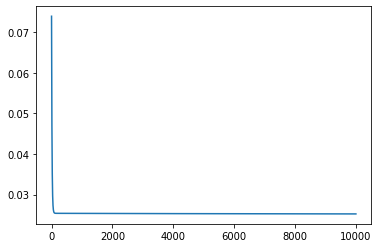

In [10]:
plt.plot(hist)
plt.show

In [11]:
sess.run(w)

array([0.51034486], dtype=float32)

In [12]:
sess.run(b)

array([0.8608778], dtype=float32)

In [13]:
sess.run(hx,{x:40})

array([21.274673], dtype=float32)

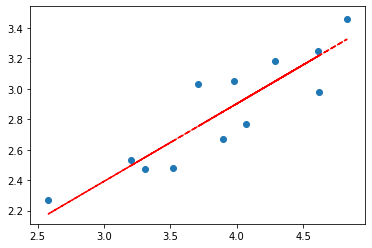

In [14]:
# plt.xlabel('전기생산량')
# plt.ylabel('전기사용량')
plt.plot(df['전기생산량'], sess.run(hx,{x:df['전기생산량']}), 'r--')
plt.scatter(df['전기생산량'], df['전기사용량'])
plt.show()